In [120]:
import psycopg2
import os
import json
import argparse
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import font_manager
import numpy as np


lcs="lcs558k"
lcs_dedup = "lcs558k_deduplicate"
pope="pope"
pope_dedup = "pope_deduplicate"
mme="mme"
mme_dedup = "mme_deduplicate"
instruct = "instructmix665k"
instruct_dedup = "instructmix665k_deduplicate"
db_dict=dict(database='language_level_word_count',user='songmingyang',password='123456',host='SH-IDCA1404-10-140-54-108',port='5432')

In [121]:

def connect_db(db_dict):
        conn = psycopg2.connect(**db_dict)
        cursor = conn.cursor()
        return conn,cursor
    
def fetch_table_data(table_name):
        conn,cursor = connect_db(db_dict)
        cursor.execute(f"SELECT * FROM {table_name} ORDER BY count DESC;")
        data = cursor.fetchall()
        conn.close()
        return data

def get_data_ratio(data):
        data_num = [x[1] for x in data]
        data_title = [x[0] for x in data]
        data_sum = sum(data_num)
        data_ratio = [x*100.0/data_sum for x in data_num]
        return data_num, data_title, data_ratio

def get_data_ratio_by_table_name(table_name):
        data = fetch_table_data(table_name)
        data_num, data_title, data_ratio = get_data_ratio(data)
        return data_num, data_title, data_ratio

In [122]:
lcs_data,lcs_title,lcs_ratio = get_data_ratio_by_table_name(lcs)
lcs_dedup_data,lcs_dedup_title,lcs_dedup_ratio = get_data_ratio_by_table_name(lcs_dedup)
instruct_data,instruct_title,instruct_ratio = get_data_ratio_by_table_name(instruct)
instruct_dedup_data,instruct_dedup_title,instruct_dedup_ratio = get_data_ratio_by_table_name(instruct_dedup)
pope_data,pope_title,pope_ratio = get_data_ratio_by_table_name(pope)
pope_dedup_data,pope_dedup_title,pope_dedup_ratio = get_data_ratio_by_table_name(pope_dedup)
mme_data,mme_title,mme_ratio = get_data_ratio_by_table_name(mme)
mme_dedup_data,mme_dedup_title,mme_dedup_ratio = get_data_ratio_by_table_name(mme_dedup)


In [123]:
pope_dict = dict(zip(pope_title,pope_data))
lcs_dict = dict(zip(lcs_title,lcs_data))
mme_dict = dict(zip(mme_title,mme_data))
instruct_dict = dict(zip(instruct_title,instruct_data))




In [124]:
mme_sum = sum(mme_data)
pope_sum = sum(pope_data)


lcs_mme_num = [lcs_dict.get(x,0) for x in mme_title]
lcs_mme_sum = sum(lcs_mme_num)
lcs_mme_ratio = [x*100.0/lcs_mme_sum for x in lcs_mme_num]

instruct_mme_num = [instruct_dict.get(x,0) for x in mme_title]
instruct_mme_sum = sum(instruct_mme_num)
instruct_mme_ratio = [x*100.0/instruct_mme_sum for x in instruct_mme_num]


mme_lcs_num = [mme_dict.get(x,0) for x in lcs_title]
mme_lcs_sum = sum(mme_lcs_num)
mme_lcs_ratio = [x*100.0/mme_sum for x in mme_lcs_num]

pope_lcs_num = [pope_dict.get(x,0) for x in lcs_title]
pope_lcs_sum = sum(pope_lcs_num)
pope_lcs_ratio = [x*100.0/pope_sum for x in pope_lcs_num]

mme_instruct_num = [mme_dict.get(x,0) for x in instruct_title]
mme_instruct_sum = sum(mme_instruct_num)
mme_instruct_ratio = [x*100.0/mme_sum for x in mme_instruct_num]

pope_instruct_num = [pope_dict.get(x,0) for x in instruct_title]
pope_instruct_sum = sum(pope_instruct_num)
pope_instruct_ratio = [x*100.0/pope_sum for x in pope_instruct_num]





### 1. Token-level Long Tail problem

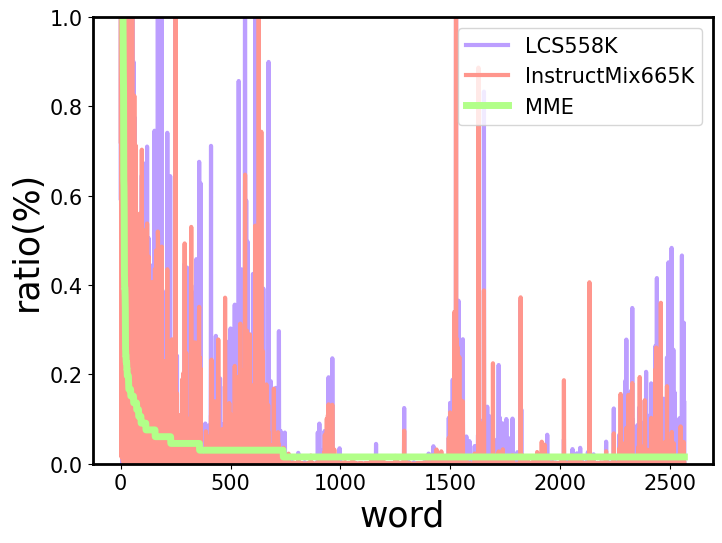

In [143]:

plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]
plt.plot(lcs_mme_ratio, zorder=2, label="LCS558K",linewidth=3,color=colors[4])
plt.plot(instruct_mme_ratio, zorder=2, label="InstructMix665K",linewidth=3,color=colors[2])
plt.plot(mme_ratio, zorder=2, label="MME",linewidth=5,color=colors[3])
plt.ylim(0,1)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('word',fontsize=25)
plt.legend(frameon=True,fontsize=15,loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/token_mme_lt_lcs.pdf", format='pdf')
plt.show()


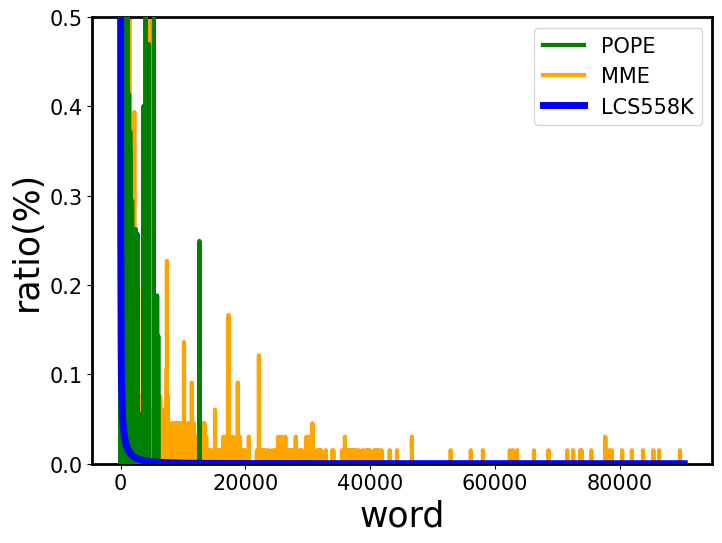

In [144]:
plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]

plt.plot(pope_lcs_ratio, zorder=3, label="POPE",linewidth=3,color='green')
plt.plot(mme_lcs_ratio, zorder=2, label="MME",linewidth=3,color='orange')
plt.plot(lcs_ratio, zorder=4, label="LCS558K",linewidth=5,color='blue')
plt.ylim(0,0.5)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('word',fontsize=25)
plt.legend(frameon=True,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/token_lcs_lt_pope_mme.pdf", format='pdf')
plt.show()

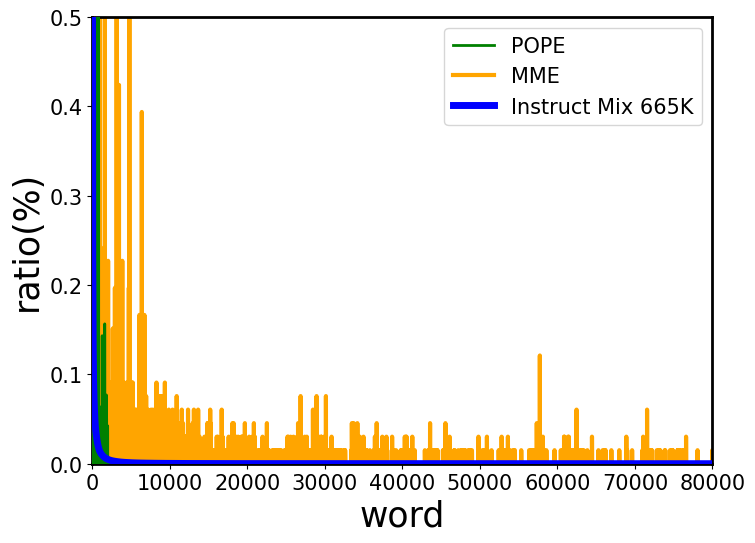

In [150]:
plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]

plt.plot(pope_instruct_ratio, zorder=3, label="POPE",linewidth=2,color='green')
plt.plot(mme_instruct_ratio, zorder=2, label="MME",linewidth=3,color='orange')
plt.plot(instruct_ratio, zorder=4, label="Instruct Mix 665K",linewidth=5,color='blue')
plt.ylim(0,0.5)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('word',fontsize=25)
plt.legend(frameon=True,fontsize=15,loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,80000)
ax = plt.gca()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/token_instruct_lt_pope_mme.pdf", format='pdf')
plt.show()


### 2. Object-level Long tail problem

In [151]:

pope_dedup_dict = dict(zip(pope_dedup_title,pope_dedup_data))
lcs_dedup_dict = dict(zip(lcs_dedup_title,lcs_dedup_data))
mme_dedup_dict = dict(zip(mme_dedup_title,mme_dedup_data))
instruct_dedup_dict = dict(zip(instruct_dedup_title,instruct_dedup_data))

mme_dedup_sum = sum(mme_dedup_data)
pope_dedup_sum = sum(pope_dedup_data)

lcs_mme_dedu_num = [lcs_dedup_dict.get(x,0) for x in mme_dedup_title]
lcs_mme_dedu_sum = sum(lcs_mme_dedu_num)
lcs_mme_dedu_ratio = [x*100.0/lcs_mme_dedu_sum for x in lcs_mme_dedu_num]

instruct_mme_dedu_num = [instruct_dedup_dict.get(x,0) for x in mme_dedup_title]
instruct_mme_dedu_sum = sum(instruct_mme_dedu_num)
instruct_mme_dedu_ratio = [x*100.0/instruct_mme_dedu_sum for x in instruct_mme_dedu_num]


mme_lcs_dedu_num = [mme_dedup_dict.get(x,0) for x in lcs_dedup_title]
mme_lcs_dedu_sum = sum(mme_lcs_dedu_num)
mme_lcs_dedu_ratio = [x*100.0/mme_dedup_sum for x in mme_lcs_dedu_num]


pope_lcs_dedu_num = [pope_dedup_dict.get(x,0) for x in lcs_dedup_title]
pope_lcs_dedu_sum = sum(pope_lcs_dedu_num)
pope_lcs_dedu_ratio = [x*100.0/pope_dedup_sum for x in pope_lcs_dedu_num]


mme_instruct_dedu_num = [mme_dedup_dict.get(x,0) for x in instruct_dedup_title]
mme_instruct_dedu_sum = sum(mme_instruct_dedu_num)
mme_instruct_dedu_ratio = [x*100.0/mme_dedup_sum for x in mme_instruct_dedu_num]

pope_instruct_dedu_num = [pope_dedup_dict.get(x,0) for x in instruct_dedup_title]
pope_instruct_dedu_sum = sum(pope_instruct_dedu_num)
pope_instruct_dedu_ratio = [x*100.0/pope_dedup_sum for x in pope_instruct_dedu_num]

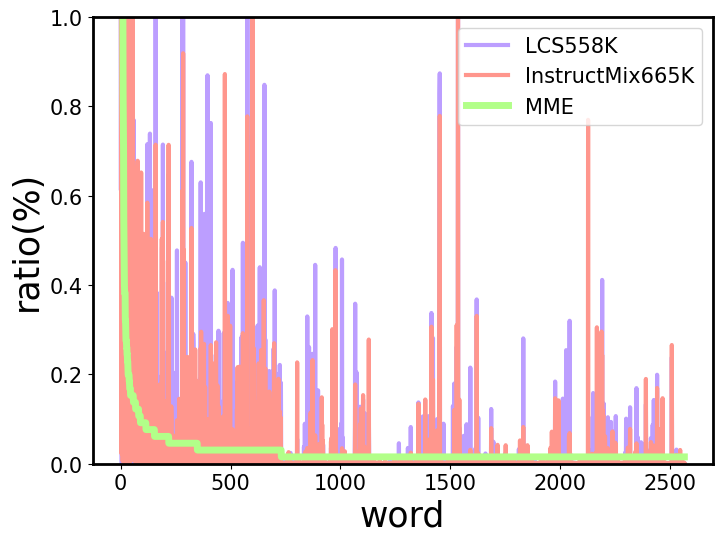

In [152]:

plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]
plt.plot(lcs_mme_dedu_ratio, zorder=2, label="LCS558K",linewidth=3,color=colors[4])
plt.plot(instruct_mme_dedu_ratio, zorder=2, label="InstructMix665K",linewidth=3,color=colors[2])
plt.plot(mme_dedup_ratio, zorder=2, label="MME",linewidth=5,color=colors[3])

plt.ylim(0,1)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('word',fontsize=25)
plt.legend(frameon=True,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/object_mme_lt_lcs.pdf", format='pdf')
plt.show()


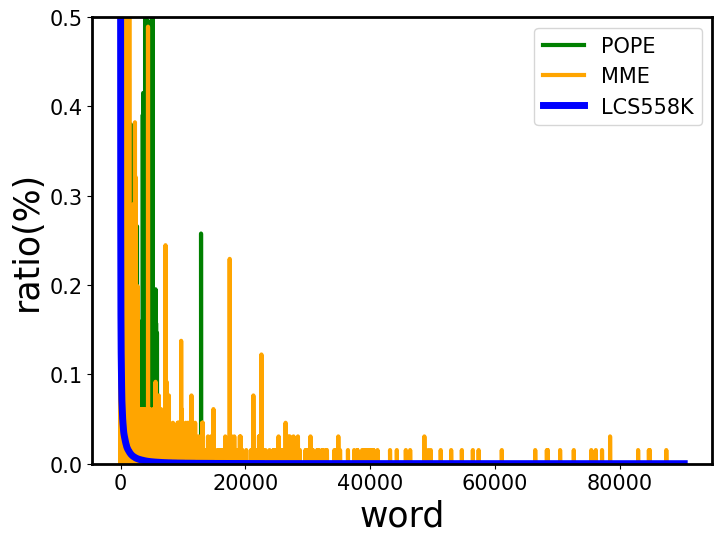

In [153]:
plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]

plt.plot(pope_lcs_dedu_ratio, zorder=2, label="POPE",linewidth=3,color='green')
plt.plot(mme_lcs_dedu_ratio, zorder=2, label="MME",linewidth=3,color='orange')
plt.plot(lcs_dedup_ratio, zorder=2, label="LCS558K",linewidth=5,color='blue')
plt.ylim(0,0.5)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('word',fontsize=25)
plt.legend(frameon=True,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/object_lcs_lt_pope_mme.pdf", format='pdf')
plt.show()

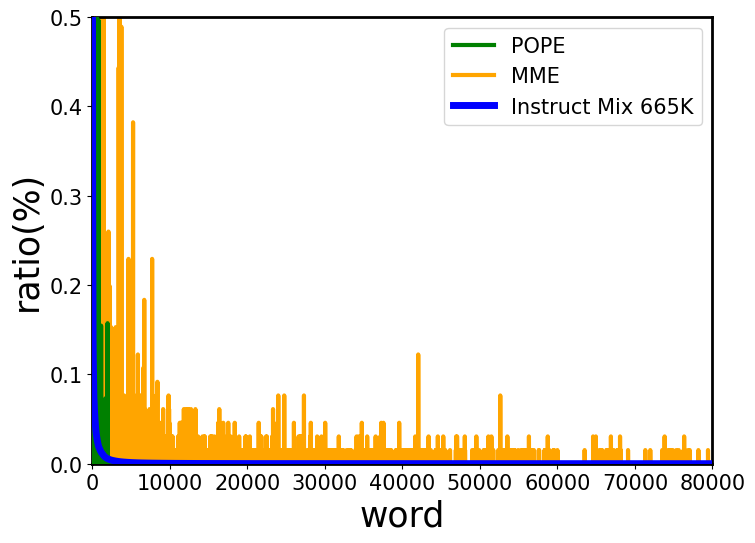

In [154]:
plt.figure(figsize=(8,5.8))
# plt.grid(True,axis='y',zorder=1)
# plt.plot(lcs_ratio, zorder=2
colors = [ '#ffe598', '#87edff', '#ff968d', '#b2ff89','#bc9eff','#bdbca5', 'grey', 'yellow','k','brown','grey','cyan',"pink"]

plt.plot(pope_instruct_dedu_ratio, zorder=3, label="POPE",linewidth=3,color='green')
plt.plot(mme_instruct_dedu_ratio, zorder=2, label="MME",linewidth=3,color='orange')
plt.plot(instruct_dedup_ratio, zorder=4, label="Instruct Mix 665K",linewidth=5,color='blue')
plt.ylim(0,0.5)
plt.xlim(0,80000)
plt.legend()
# plt.xticks([0,50,100,150,200,250,300,2500,2550],mme_title[3:10]+mme_title[-2:],rotation=90)
plt.ylabel('ratio(%)',fontsize=25)
plt.xlabel('word',fontsize=25)
plt.legend(frameon=True,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.savefig("./res/object_instruct_lt_pope_mme.pdf", format='pdf')
plt.show()
